# Proyek Analisis Data: E-Commerce-public-dataset
- **Nama:** Florence Nightingle Manurung
- **Email:** florence.nightingle.manurung@gmail.com
- **ID Dicoding:** florencemnrg

## Menentukan Pertanyaan Bisnis

- Which city does has most and least revenue?
- Which categories are most sold?
- How about the e-commerce sales? Did they grow up over time?

## Import Semua Packages/Library yang Digunakan

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Wrangling

### Gathering Data

In [3]:
customers = pd.read_csv(r'C:\Users\ASUS ROG X13\Documents\mentor-dicoding-2025\Proyek Analisis Data\Data\E-commerce-public-dataset\customers_dataset.csv', dtype={'customer_zip_code_prefix': str})
geolocation = pd.read_csv(r'C:\Users\ASUS ROG X13\Documents\mentor-dicoding-2025\Proyek Analisis Data\Data\E-commerce-public-dataset\geolocation_dataset.csv', dtype={'geolocation_zip_code_prefix': str})
orders= pd.read_csv(r'C:\Users\ASUS ROG X13\Documents\mentor-dicoding-2025\Proyek Analisis Data\Data\E-commerce-public-dataset\orders_dataset.csv')
order_items = pd.read_csv(r'C:\Users\ASUS ROG X13\Documents\mentor-dicoding-2025\Proyek Analisis Data\Data\E-commerce-public-dataset\order_items_dataset.csv')
order_payments = pd.read_csv(r'C:\Users\ASUS ROG X13\Documents\mentor-dicoding-2025\Proyek Analisis Data\Data\E-commerce-public-dataset\order_payments_dataset.csv')
order_reviews = pd.read_csv(r'C:\Users\ASUS ROG X13\Documents\mentor-dicoding-2025\Proyek Analisis Data\Data\E-commerce-public-dataset\order_reviews_dataset.csv')
products = pd.read_csv(r'C:\Users\ASUS ROG X13\Documents\mentor-dicoding-2025\Proyek Analisis Data\Data\E-commerce-public-dataset\products_dataset.csv')
product_cat = pd.read_csv(r'C:\Users\ASUS ROG X13\Documents\mentor-dicoding-2025\Proyek Analisis Data\Data\E-commerce-public-dataset\product_category_name_translation.csv')
sellers = pd.read_csv(r'C:\Users\ASUS ROG X13\Documents\mentor-dicoding-2025\Proyek Analisis Data\Data\E-commerce-public-dataset\sellers_dataset.csv')

In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
print(len(orders))
print(orders['order_purchase_timestamp'].min())
print(orders['order_purchase_timestamp'].max())

99441
2016-09-04 21:15:19
2018-10-17 17:30:18


In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
geolocation[geolocation['geolocation_zip_code_prefix'] == '14409'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
334422,14409,-20.509897,-47.397866,franca,SP
334449,14409,-20.497396,-47.399241,franca,SP
334459,14409,-20.510459,-47.399553,franca,SP
334462,14409,-20.480940,-47.394161,franca,SP
334463,14409,-20.515413,-47.398194,franca,SP


In [8]:
geolocation['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

,count
count,19015.000000
mean,52.598633
std,72.057907
min,1.000000
25%,10.000000
50%,29.000000
75%,66.500000
max,1146.000000


**Dataset Summary:**

- Contains ~100,000 orders made between 2016 and 2018.
- Each order includes detailed customer information, in which customer location is partially identified by their zip code.
- The dataset is linked with a geolocation database, enabling spatial analysis based on these zip code prefixes.

### Assessing Data

In [9]:
datasets = {
    'customer': customers,
    'geolocation': geolocation,
    'orders': orders,
    'order_items': order_items,
    'order_payments': order_payments,
    'order_reviews': order_reviews,
    'products': products,
    'sellers': sellers,
}

summary = []

for name, df in datasets.items():
    n_rows = df.shape[0]
    n_cols = df.shape[1]
    null_amount = df.isnull().sum().sum()  # total null values
    null_cols = df.columns[df.isnull().any()].tolist()  # columns with nulls
    qty_null_columns = len(null_cols)

    summary.append({
        'dataset': name,
        'n_rows': n_rows,
        'n_cols': n_cols,
        'null_amount': null_amount,
        'qty_null_columns': qty_null_columns,
        'null_columns': ', '.join(null_cols)
    })

summary_df = pd.DataFrame(summary)

summary_rows = []

for dataset_name, df in datasets.items():
    for col in df.columns:
        null_count = df[col].isnull().sum()
        if null_count > 0:  # only columns with nulls
            percent_null = null_count / len(df)
            dtype = df[col].dtype
            qtd_cat = df[col].nunique() if dtype == 'object' else 0

            summary_rows.append({
                'dataset_name': dataset_name,
                'feature': col,
                'qtd_null': null_count,
                'percent_null': percent_null,
                'dtype': dtype,
                'qtd_cat': qtd_cat,
            })

summary_null = pd.DataFrame(summary_rows)

In [10]:
summary_df

,dataset,n_rows,n_cols,null_amount,qty_null_columns,null_columns
0,customer,99441,5,0,0,
1,geolocation,1000163,5,0,0,
2,orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_dat..."
3,order_items,112650,7,0,0,
4,order_payments,103886,5,0,0,
5,order_reviews,99224,7,145903,2,"review_comment_title, review_comment_message"
6,products,32951,9,2448,8,"product_category_name, product_name_lenght, pr..."
7,sellers,3095,4,0,0,


In [11]:
summary_null

,dataset_name,feature,qtd_null,percent_null,dtype,qtd_cat
0,orders,order_approved_at,160,0.001609,object,90733
1,orders,order_delivered_carrier_date,1783,0.017930,object,81018
2,orders,order_delivered_customer_date,2965,0.029817,object,95664
3,order_reviews,review_comment_title,87656,0.883415,object,4527
4,order_reviews,review_comment_message,58247,0.587025,object,36159
5,products,product_category_name,610,0.018512,object,73
6,products,product_name_lenght,610,0.018512,float64,0
7,products,product_description_lenght,610,0.018512,float64,0
8,products,product_photos_qty,610,0.018512,float64,0
9,products,product_weight_g,2,0.000061,float64,0


In [12]:

# Assessing Data
print("=== Missing Values ===")
print(orders.isnull().sum()[orders.isnull().sum() > 0])

print("\n=== Duplicate Rows ===")
print(f"Duplicate rows in orders dataset: {orders.duplicated().sum()}")
print(f"Duplicate rows in order_items dataset: {order_items.duplicated().sum()}")

print("\n=== Date Format Consistency ===")
date_cols_orders = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']
for col in date_cols_orders:
    valid_dates = pd.to_datetime(orders[col], errors='coerce').notnull().all()
    print(f"Column `{col}` valid datetime: {valid_dates}")

print("\n=== Feature Overview ===")
print(orders.dtypes)
print(orders.nunique())

print("\n=== Negative Values Check ===")
numeric_cols = orders.select_dtypes(include='number').columns
neg_values = {}
for col in numeric_cols:
    neg_count = (orders[col] < 0).sum()
    if neg_count > 0:
        neg_values[col] = neg_count
if neg_values:
    print("Negative values detected:")
    print(neg_values)
else:
    print("No negative values detected in numeric columns.")

print(f"Number of numeric columns: {len(numeric_cols)}")
print("Numeric columns:", numeric_cols.tolist())

# Use a valid index, for example the first numeric column:
if len(numeric_cols) > 0:
    col = numeric_cols[0]
    plt.figure(figsize=(8,4))
    sns.boxplot(x=orders[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
else:
    print("No numeric columns found to visualize.")


=== Missing Values ===
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

=== Duplicate Rows ===
Duplicate rows in orders dataset: 0
Duplicate rows in order_items dataset: 0

=== Date Format Consistency ===
Column `order_approved_at` valid datetime: False
Column `order_delivered_carrier_date` valid datetime: False
Column `order_delivered_customer_date` valid datetime: False

=== Feature Overview ===
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object
order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at             

**Insight:**
- Missing Values:
orders: 4,908 missing values in 3 date columns (~0.1-3% null).
order_reviews: High null rate in comment fields (88% and 58% null).
products: Around 2,448 nulls mostly in category and description fields (~1.8%).

- Data Types & Nulls:
Mostly missing values in string/object columns (dates and comments).
Some numeric columns (product dimensions) have very few nulls.

### Cleaning Data

Some coordinate points in the dataset fall outside Brazilian territory. To ensure accuracy, we should restrict all coordinates to lie within a rectangular boundary defined by Brazil’s geographical limits.

Outliers detected in geolocation_lat: 168240 rows


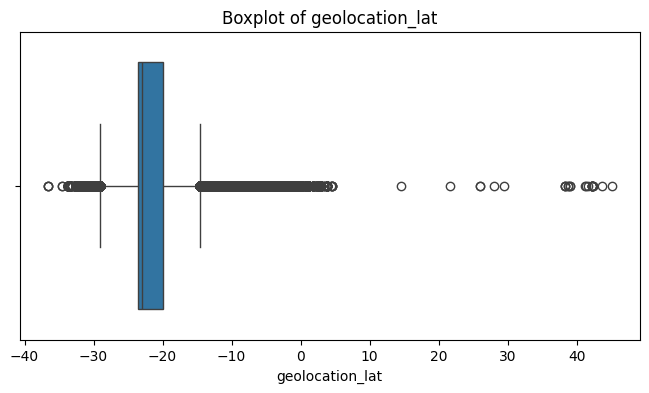

Outliers detected in geolocation_lng: 42348 rows


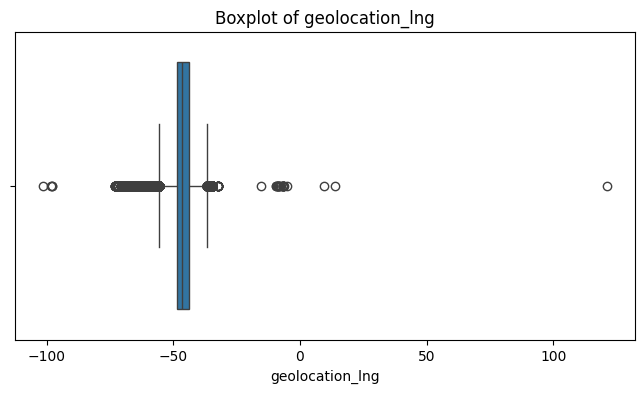

In [13]:
columns_to_check = [ 'geolocation_lat', 'geolocation_lng']

for col in columns_to_check:
    Q1 = geolocation[col].quantile(0.25)
    Q3 = geolocation[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = geolocation[(geolocation[col] < (Q1 - 1.5 * IQR)) | (geolocation[col] > (Q3 + 1.5 * IQR))]
    
    print(f"Outliers detected in {col}: {len(outliers)} rows")
    
    # Visualize with boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=geolocation[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [14]:
# Removing some outliers
geolocation = geolocation[geolocation.geolocation_lat <= 5.27438888]
geolocation = geolocation[geolocation.geolocation_lng >= -73.98283055]
geolocation = geolocation[geolocation.geolocation_lat >= -33.75116944]
geolocation = geolocation[geolocation.geolocation_lng <=  -34.79314722]

## Exploratory Data Analysis (EDA)

Zip Code is composed by 5 digits that represent Region, Subregion, Sector, Subsector and Subsector Splitter.

In [15]:
# Extract zip code prefix digits
for i in range(1, 5):
    geolocation[f'geolocation_zip_code_prefix_{i}_digits'] = geolocation['geolocation_zip_code_prefix'].str[:i].astype(int)

# Convert full prefix to int
geolocation['geolocation_zip_code_prefix'] = geolocation['geolocation_zip_code_prefix'].astype(int)

# Extract first 3 digits of customer zip code prefix as int
customers['customer_zip_code_prefix_4_digits'] = customers['customer_zip_code_prefix'].str[:4].astype(int)

In [16]:
order_df = orders.merge(order_items, on='order_id') \
                 .merge(customers, on='customer_id') \
                 .merge(order_reviews, on='order_id') \
                 .merge(products, on='product_id') \
                 .merge(product_cat, on='product_category_name')
                 

In [17]:
geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_3_digits,geolocation_zip_code_prefix_4_digits
0,1037,-23.545621,-46.639292,sao paulo,SP,0,1,10,103
1,1046,-23.546081,-46.644820,sao paulo,SP,0,1,10,104
2,1046,-23.546129,-46.642951,sao paulo,SP,0,1,10,104


In [18]:
geo_copy = geolocation.set_index('geolocation_zip_code_prefix_4_digits').copy()

In [19]:
gp = order_df.groupby('customer_zip_code_prefix_4_digits')['price'].sum().to_frame()
revenue = geo_copy.join(gp)
agg_name = 'revenue'
revenue[agg_name] = revenue.price 

In [20]:
revenue.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_3_digits,price,revenue
geolocation_zip_code_prefix_4_digits,,,,,,,,,,
103,1037,-23.545621,-46.639292,sao paulo,SP,0,1,10,4781.67,4781.67
104,1046,-23.546081,-46.644820,sao paulo,SP,0,1,10,5639.48,5639.48
104,1046,-23.546129,-46.642951,sao paulo,SP,0,1,10,5639.48,5639.48
104,1041,-23.544392,-46.639499,sao paulo,SP,0,1,10,5639.48,5639.48
103,1035,-23.541578,-46.641607,sao paulo,SP,0,1,10,4781.67,4781.67


## Visualization & Explanatory Analysis

### Pertanyaan 1: Which city has most and least revenue?

In [21]:
revenue[['geolocation_city', 'geolocation_state', 'revenue']].drop_duplicates().sort_values(by= 'revenue', ascending=False).head()

,geolocation_city,geolocation_state,revenue
geolocation_zip_code_prefix_4_digits,,,
1321,jundiaí,SP,54807.58
1321,jundiai,SP,54807.58
2279,rio de janeiro,RJ,47690.35
1308,campinas,SP,37713.51
2910,vila velha,ES,37242.76


In [22]:
revenue_result = revenue.groupby(['geolocation_state', 'revenue']).agg({'geolocation_city': 'max'}).reset_index()

In [23]:
revenue_result.sort_values(by= 'revenue', ascending=False).head()

,geolocation_state,revenue,geolocation_city
5578,SP,54807.58,jundiaí
3444,RJ,47690.35,rio de janeiro
5577,SP,37713.51,campinas
947,ES,37242.76,vila velha
1892,MG,35237.86,são sebastião do oeste


In [24]:
revenue_result.sort_values(by= 'revenue', ascending=True).head()

,geolocation_state,revenue,geolocation_city
2566,PR,5.90,sabáudia
2049,PA,6.00,senador jose porfirio
1282,MG,6.00,santo antônio do rio abaixo
3019,RJ,8.00,santa maria
89,BA,8.09,érico cardoso


C:\Users\ASUS ROG X13\AppData\Local\Temp\ipykernel_11704\2160644962.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_revenue, y='geolocation_city', x='revenue', ax=axs[0], palette='viridis')
C:\Users\ASUS ROG X13\AppData\Local\Temp\ipykernel_11704\2160644962.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom5_revenue, y='geolocation_city', x='revenue', ax=axs[1], palette='viridis')


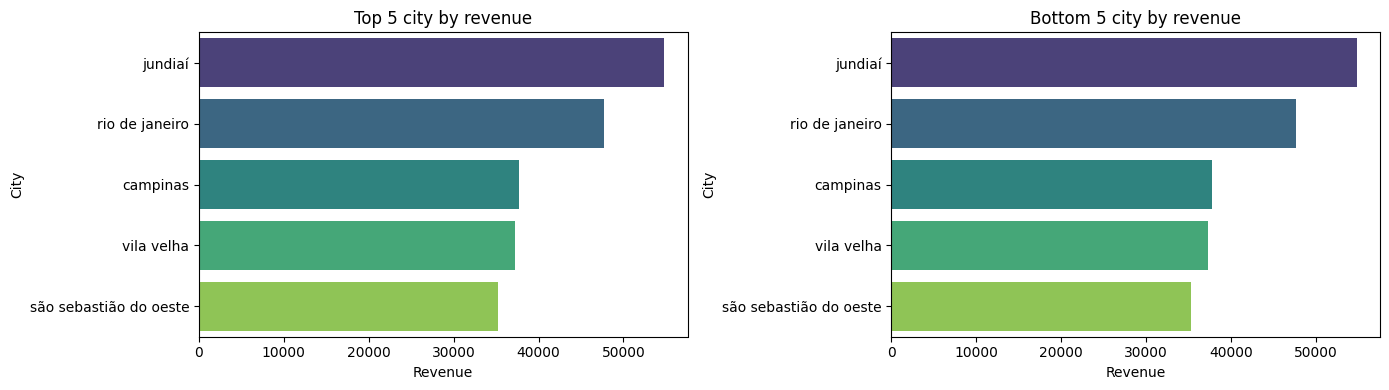

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Top 5 states with highest average freight value
top5_revenue = revenue_result.sort_values(by= 'revenue', ascending=False).head()
sns.barplot(data=top5_revenue, y='geolocation_city', x='revenue', ax=axs[0], palette='viridis')
axs[0].set_title('Top 5 city by revenue')
axs[0].set_xlabel('Revenue')
axs[0].set_ylabel('City')

# Top 5 states with highest average time to delivery
bottom5_revenue = revenue_result.sort_values(by='revenue', ascending=False).head(5)
sns.barplot(data=bottom5_revenue, y='geolocation_city', x='revenue', ax=axs[1], palette='viridis')
axs[1].set_title('Bottom 5 city by revenue')
axs[1].set_xlabel('Revenue')
axs[1].set_ylabel('City')

plt.tight_layout()
plt.show()


**Insight:**
- Top 5 city by revenue : jundiaí,SP; rio de janeiro,RJ; campinas,SP; vila velha,ES; são sebastião do oeste,MG;
- Bottom 5 city by revenue : sabáudia,PR; santo antônio do rio abaixo,MG; senador jose porfirio,PA; santa maria,RJ; érico cardoso,BA;

### Pertanyaan 2: Which categories are most and least sold?

In [26]:
prd = order_df.groupby('product_category_name_english')['order_item_id'].sum().to_frame().reset_index()

In [27]:
prd.sort_values(by='order_item_id', ascending=False).head()

,product_category_name_english,order_item_id
7,bed_bath_table,13733
39,furniture_decor,11522
43,health_beauty,11027
65,sports_leisure,9928
15,computers_accessories,9909


In [28]:
prd.sort_values(by='order_item_id', ascending=True).head()

,product_category_name_english,order_item_id
61,security_and_services,2
29,fashion_childrens_clothes,8
52,la_cuisine,15
11,cds_dvds_musicals,16
3,arts_and_craftmanship,26


C:\Users\ASUS ROG X13\AppData\Local\Temp\ipykernel_11704\1193628203.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_cat, y='product_category_name_english', x='order_item_id', ax=axs[0], palette='viridis')
C:\Users\ASUS ROG X13\AppData\Local\Temp\ipykernel_11704\1193628203.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom5_cat, y='product_category_name_english', x='order_item_id', ax=axs[1], palette='viridis')


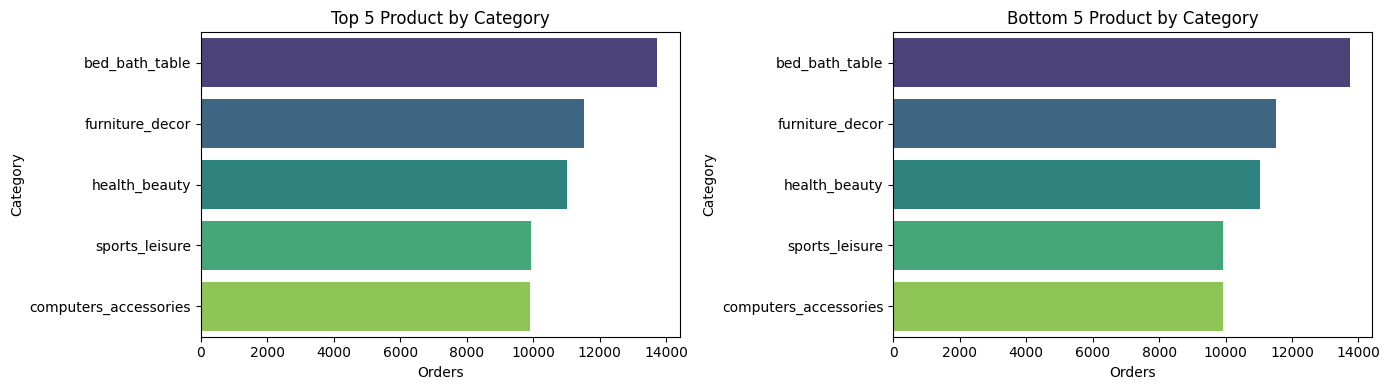

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Top 5 states with highest average freight value
top5_cat = prd.sort_values(by= 'order_item_id', ascending=False).head()
sns.barplot(data=top5_cat, y='product_category_name_english', x='order_item_id', ax=axs[0], palette='viridis')
axs[0].set_title('Top 5 Product by Category')
axs[0].set_xlabel('Orders')
axs[0].set_ylabel('Category')

# Top 5 states with highest average time to delivery
bottom5_cat = prd.sort_values(by='order_item_id', ascending=False).head(5)
sns.barplot(data=bottom5_cat, y='product_category_name_english', x='order_item_id', ax=axs[1], palette='viridis')
axs[1].set_title('Bottom 5 Product by Category')
axs[1].set_xlabel('Orders')
axs[1].set_ylabel('Category')

plt.tight_layout()
plt.show()

**Insight:**
- Top 5 products by category : bed_bath_table, furniture_decor, health_beauty, sports_leisure, computers_accessories;
- Bottom 5 products by category : security_and_services, fashion_childrens_clothes, la_cuisine, cds_dvds_musicals, arts_and_craftmanship;

### Pertanyaan 3: How about the e-commerce sales? Did they grow up over time?

In [30]:
# Make sure timestamp column is datetime type
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])

# Extract year_month in YYYYMM format
order_df['year_month'] = order_df['order_purchase_timestamp'].dt.strftime('%Y%m')

# Extract day name (Monday, Tuesday, etc.)
order_df['day_name'] = order_df['order_purchase_timestamp'].dt.day_name()

# Extract hour for time categorization
order_df['hour'] = order_df['order_purchase_timestamp'].dt.hour

# Define function to categorize time of day
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'dawn'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'night'

# Apply time category
order_df['time_category'] = order_df['hour'].apply(categorize_time)

# Optional: drop the intermediate 'hour' column if not needed
order_df.drop(columns=['hour'], inplace=True)


In [31]:
# Display the result
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_zip_code_prefix_4_digits,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,year_month,day_name,time_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,314,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,201710,Monday,morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,4781,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,201807,Tuesday,night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,7526,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,201808,Wednesday,morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,5929,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,201711,Saturday,night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,09195,santo andre,SP,919,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,201802,Tuesday,night


In [32]:
df_monthly = order_df.groupby('year_month')['order_item_id'].sum().to_frame().reset_index()
df_dayofweek = order_df.groupby('day_name')['order_item_id'].sum().to_frame().reset_index()
df_timeofday = order_df.groupby('time_category')['order_item_id'].sum().to_frame().reset_index()

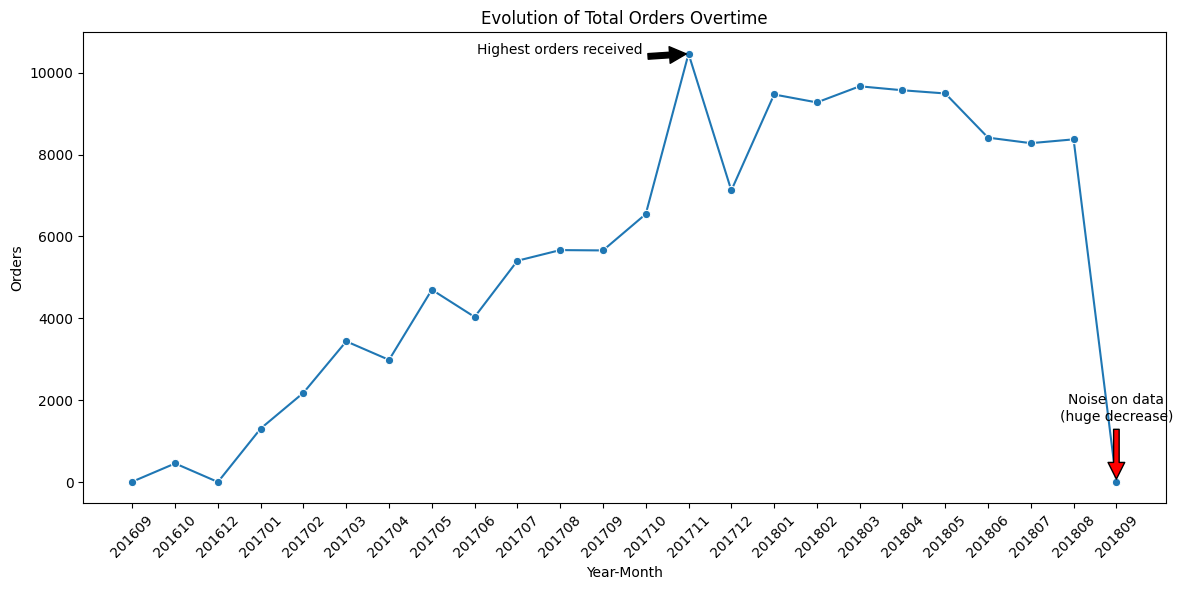

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x='year_month', y='order_item_id', marker='o')
plt.title('Evolution of Total Orders Overtime')
plt.xticks(rotation=45)

# Annotate max point
max_idx = df_monthly['order_item_id'].idxmax()
plt.annotate('Highest orders received',
             xy=(max_idx, df_monthly.loc[max_idx, 'order_item_id']),
             xytext=(max_idx-3, df_monthly['order_item_id'].max()),  
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10,
             ha='center')

# Annotate min point
min_value = df_monthly['order_item_id'].min()
min_rows = df_monthly[df_monthly['order_item_id'] == min_value]
min_row = min_rows.loc[min_rows['year_month'].idxmax()]
min_idx = min_rows['year_month'].idxmax()
plt.annotate('Noise on data\n(huge decrease)',
             xy=(min_idx, df_monthly.loc[min_idx, 'order_item_id']),
             xytext=(min_idx, df_monthly['order_item_id'].min() + 1500),  # Geser agak ke atas
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10,
             ha='center')

plt.xlabel('Year-Month')
plt.ylabel('Orders')
plt.tight_layout()
plt.show()

C:\Users\ASUS ROG X13\AppData\Local\Temp\ipykernel_11704\308755154.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_dayofweek, x='day_name', y='order_item_id', ax=axs[0], palette='Blues_d')
C:\Users\ASUS ROG X13\AppData\Local\Temp\ipykernel_11704\308755154.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_timeofday, x='time_category', y='order_item_id', ax=axs[1], palette='Set2')


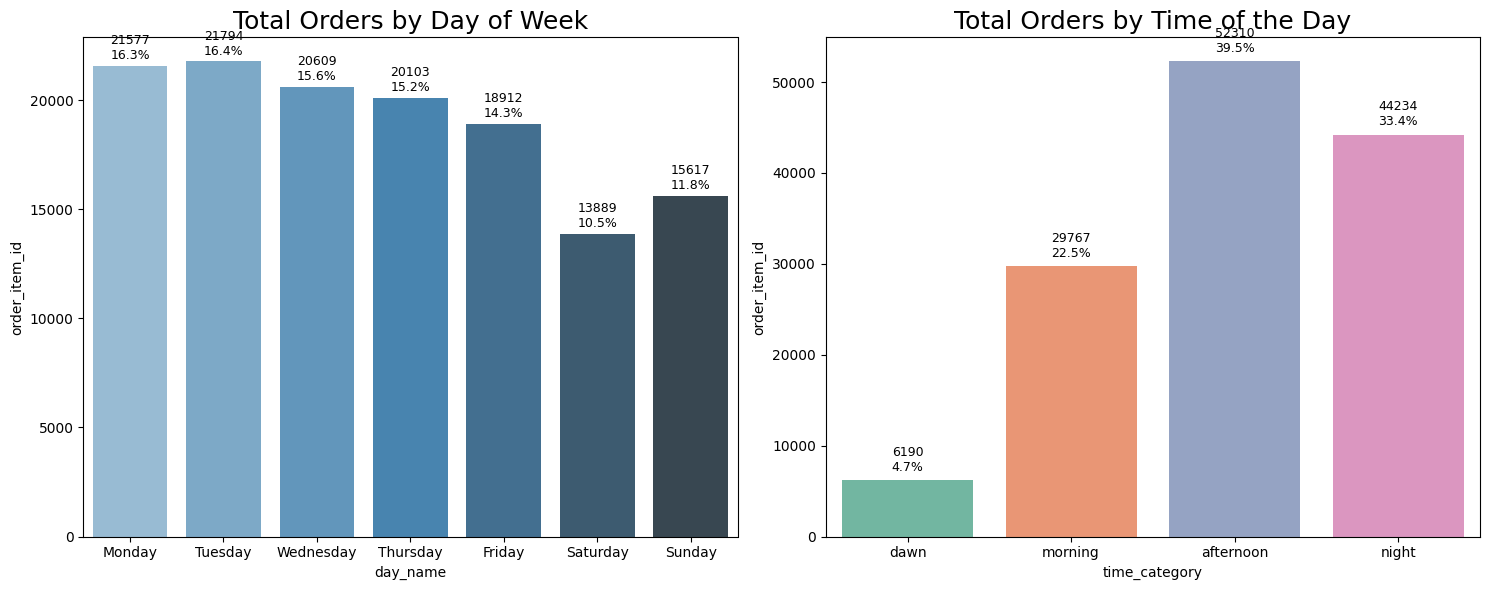

In [34]:
# Define ordered categories
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time_order = ['dawn', 'morning', 'afternoon', 'night']

# Convert to categorical with order
df_dayofweek['day_name'] = pd.Categorical(df_dayofweek['day_name'], categories=day_order, ordered=True)
df_dayofweek = df_dayofweek.sort_values('day_name')

df_timeofday['time_category'] = pd.Categorical(df_timeofday['time_category'], categories=time_order, ordered=True)
df_timeofday = df_timeofday.sort_values('time_category')

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot total orders by day of week
sns.barplot(data=df_dayofweek, x='day_name', y='order_item_id', ax=axs[0], palette='Blues_d')
axs[0].set_title('Total Orders by Day of Week', fontsize=18)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)

# Add percentage labels on top of bars
total_day = df_dayofweek['order_item_id'].sum()
for i, val in enumerate(df_dayofweek['order_item_id']):
    pct = val / total_day * 100
    axs[0].text(i, val + 300, f'{val}\n{pct:.1f}%', ha='center', fontsize=9)

# Bar plot total orders by time of day
sns.barplot(data=df_timeofday, x='time_category', y='order_item_id', ax=axs[1], palette='Set2')
axs[1].set_title('Total Orders by Time of the Day', fontsize=18)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)

# Add percentage labels on top of bars
total_time = df_timeofday['order_item_id'].sum()
for i, val in enumerate(df_timeofday['order_item_id']):
    pct = val / total_time * 100
    axs[1].text(i, val + 1000, f'{val}\n{pct:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## Conclusion

#### Which city has most and least revenue?
- Top 5 city by revenue : jundiaí,SP; rio de janeiro,RJ; campinas,SP; vila velha,ES; são sebastião do oeste,MG;
- Bottom 5 city by revenue : sabáudia,PR; santo antônio do rio abaixo,MG; senador jose porfirio,PA; santa maria,RJ; érico cardoso,BA;

#### Products by category
- Top 5 products by category : bed_bath_table, furniture_decor, health_beauty, sports_leisure, computers_accessories;
- Bottom 5 products by category : security_and_services, fashion_childrens_clothes, la_cuisine, cds_dvds_musicals, arts_and_craftmanship;

#### How about the e-commerce sales? Did they grow up over time?
- Orders steadily grew to a peak in October 2017, remained high through 2018, but show a sudden data anomaly with zero orders in September 2018.

- Orders by Day of the Week:
Orders are highest on Tuesday and Monday, with around 16% each. The lowest orders occur on Saturday and Sunday, indicating reduced activity on weekends.

- Orders by Time of Day:
The majority of orders are placed in the afternoon (about 39.5%), followed by night (33.4%). Morning accounts for 22.5%, and dawn has the fewest orders (4.7%).



### Recommendations:

1. City Focus:
Invest more in top-revenue cities and analyze challenges in low-revenue cities to find growth opportunities.

2. Product Strategy:
Promote high-demand categories and reconsider or reposition underperforming ones.

3. Sales Growth and Trend Monitoring:
Leverage peak periods for campaigns; Capitalize on the sustained order volume from 2017 to 2018 by continuing successful campaigns

4. Operational Planning:
Boost resources during peak days and times; run promotions during slow periods to increase sales.



In [36]:
# Simpan CSV ke folder 'dashboard'
order_df.to_csv('dashboard/order_df.csv', index=False)